In [34]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier

In [7]:
dataset1 = pd.read_csv('createEvent_feb_28.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>0.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>0.0)]
print(data_neg.shape)
print(data_pos.shape)

(22202, 100)
(7084, 100)


In [2]:
dataset = pd.read_csv('createEvent_feb_28.csv',delimiter = ',')
# dataset1 = pd.read_csv('test_createEvent_12_18.csv',delimiter = ',') # this one does not take care the CRAN before GH date

In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(29286, 100)

In [36]:
y_val.loc[(y_val==0)].shape

(4428,)

In [5]:
dataset.describe()

,activity_intensity,activity_intensity_Q1,activity_intensity_Q2,activity_intensity_Q3,activity_intensity_Q4,class,contribution_30_10_percentage,contribution_50_30_percentage,contribution_below_10_percentage,contribution_over_50,...,num_TeamAdd_Q4,num_Watch,num_Watch_Q1,num_Watch_Q2,num_Watch_Q3,num_Watch_Q4,num_joint_project,num_joint_success_project,proj_span,team_age_in_days
count,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,...,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000
mean,2.032372,0.900518,0.925266,0.889983,1.932008,0.241890,0.011429,0.016388,0.009165,0.970327,...,0.001707,0.358567,0.294782,0.300485,0.323977,0.301851,1931.859011,1057.497781,58.686266,152.457693
std,3.694424,1.033171,0.910507,0.714117,3.562333,0.428236,0.066854,0.110770,0.059710,0.169686,...,0.046717,6.030359,4.003175,4.678314,5.570368,4.027580,3929.881167,2164.228317,193.306612,226.302552
min,0.001577,0.001577,0.001577,0.001577,0.001577,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.857143,1.000000,0.800000,0.824943,0.750000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,25.000000
75%,2.500000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,8.000000,8.000000,243.000000
max,403.000000,99.283920,36.000000,20.800000,403.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,593.000000,263.000000,483.000000,593.000000,263.000000,10065.000000,10057.000000,2258.000000,1019.000000


In [35]:
d = DummyClassifier(strategy='most_frequent')
d.fit(X_tr, y_tr)
ca = d.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = d.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = d.score(X_val, y_val)
y_pred = d.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.76234
Precision on train: 0.00000
Recall on train: 0.00000

Classification accuracy of the LogisticRegression classifier on val set: 0.75602
Precision on val: 0.00000
Recall on val: 0.00000


/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
X_tr_val, X_test, y_tr_val, y_test = train_test_split(X, y, test_size=0.2, random_state=20190101)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_val, y_tr_val, test_size=0.25, random_state=20190207)
print('training size: ', X_tr.shape[0])
print('validation size: ', X_val.shape[0])
print('test size: ', X_test.shape[0])

training size:  17571
validation size:  5857
test size:  5858


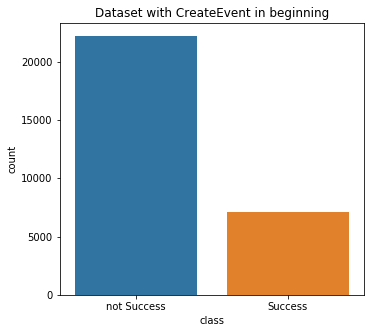

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CreateEvent in beginning')
# ax2 = plt.subplot(1,2,2)
# sns.countplot(x='class', data=dataset1)
# ax2.set_xticklabels(['not Success', 'Success'])
# plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_val)

Classification accuracy of the LogisticRegression classifier on training set: 0.94622
Precision on train: 0.95392
Recall on train: 0.81298

Classification accuracy of the LogisticRegression classifier on val set: 0.93614
Precision on val: 0.93849
Recall on val: 0.79006


array([[4354,   74],
       [ 300, 1129]])

In [9]:
ca = lr.score(X_test, y_test)
y_pred_1 = lr.predict(X_test)
p = precision_score(y_pred=y_pred_1,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred_1, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Classification accuracy of the LogisticRegression classifier on test set: 0.94418
Precision on val: 0.95212
Recall on val: 0.82015


In [10]:
# display coef for logistic regression model
# print(lr.coef_)
# print(lr.intercept_)

In [11]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_val)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [5]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [6]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Classification accuracy of the LogisticRegression classifier on training set: 0.95088
Precision on train: 0.98422
Recall on train: 0.80627

Classification accuracy of the LogisticRegression classifier on val set: 0.93973
Precision on val: 0.97193
Recall on val: 0.77537


In [10]:
# display coef for logistic regression model
# print(lr.coef_)
# print(lr.intercept_)

In [17]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_val)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [13]:
c = np.logspace(-5, 10, num=40, base=10)
score_array = np.zeros((40,))
for n in range(len(c)):
    lr = LogisticRegression(C=c[n], solver='lbfgs')
    lr.fit(X_tr, y_tr)
    score_array[n] = lr.score(X_val, y_val)
    
print(score_array)

[0.75567697 0.7558477  0.87741164 0.94024244 0.93990097 0.94041318
 0.93973024 0.94041318 0.94041318 0.94041318 0.93990097 0.93990097
 0.9395595  0.93973024 0.93990097 0.93990097 0.94024244 0.94041318
 0.94109612 0.94160833 0.94126686 0.9414376  0.9414376  0.94212054
 0.9414376  0.9419498  0.94126686 0.94160833 0.9414376  0.94160833
 0.9414376  0.9414376  0.9414376  0.9414376  0.9414376  0.9414376
 0.9414376  0.9414376  0.9414376  0.9414376 ]


In [14]:
c

array([1.00000000e-05, 2.42446202e-05, 5.87801607e-05, 1.42510267e-04,
       3.45510729e-04, 8.37677640e-04, 2.03091762e-03, 4.92388263e-03,
       1.19377664e-02, 2.89426612e-02, 7.01703829e-02, 1.70125428e-01,
       4.12462638e-01, 1.00000000e+00, 2.42446202e+00, 5.87801607e+00,
       1.42510267e+01, 3.45510729e+01, 8.37677640e+01, 2.03091762e+02,
       4.92388263e+02, 1.19377664e+03, 2.89426612e+03, 7.01703829e+03,
       1.70125428e+04, 4.12462638e+04, 1.00000000e+05, 2.42446202e+05,
       5.87801607e+05, 1.42510267e+06, 3.45510729e+06, 8.37677640e+06,
       2.03091762e+07, 4.92388263e+07, 1.19377664e+08, 2.89426612e+08,
       7.01703829e+08, 1.70125428e+09, 4.12462638e+09, 1.00000000e+10])

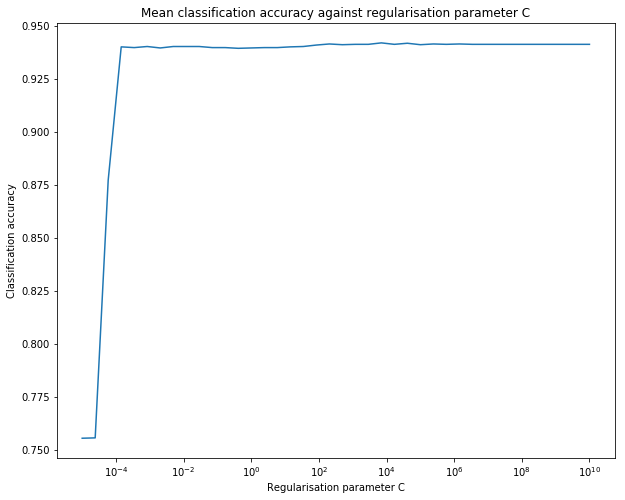

In [31]:
# score_array_mean = np.zeros((20,1))
# for n in range(20):
#     score_array_mean[n][0] = score_array[:,n].mean()
    
plt.figure(figsize=(10,8))
plt.semilogx(c, score_array, basex=10)
plt.xlabel('Regularisation parameter C')
plt.ylabel('Classification accuracy')
plt.title('Mean classification accuracy against regularisation parameter C')
plt.show()

In [32]:
C_optimal = c[score_array.argmax()]
lr = LogisticRegression(C=C_optimal, solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Classification accuracy of the LogisticRegression classifier on val set: 0.94212
Precision on val: 0.96821
Recall on val: 0.78866


In [37]:
c = np.logspace(-5, 5, num=40, base=10)
score_array = np.zeros((40,))
for n in range(len(c)):
    lr = LogisticRegression(C=c[n], solver='lbfgs')
    lr.fit(X_tr, y_tr)
    score_array[n] = lr.score(X_val, y_val)
    
print(score_array)

[0.75567697 0.75567697 0.75601844 0.87741164 0.94024244 0.93973024
 0.93990097 0.9395595  0.94007171 0.93973024 0.94041318 0.94024244
 0.94041318 0.94041318 0.94007171 0.93990097 0.94007171 0.93938877
 0.9395595  0.93990097 0.93990097 0.93990097 0.9395595  0.93990097
 0.94024244 0.9414376  0.94024244 0.94109612 0.94024244 0.9414376
 0.94126686 0.9419498  0.9414376  0.9414376  0.9419498  0.9419498
 0.9414376  0.94177907 0.9419498  0.94126686]


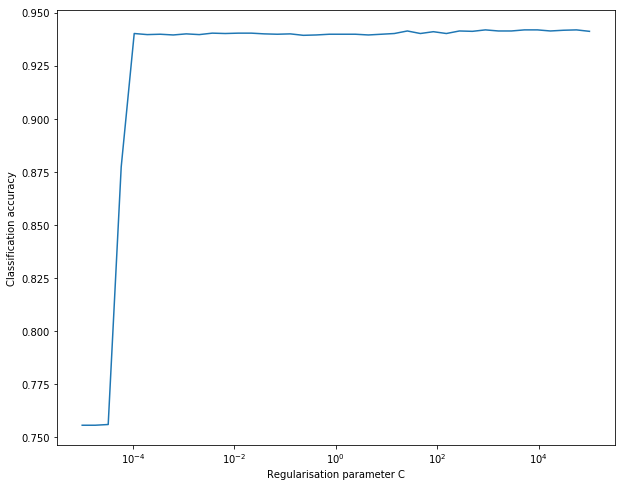

In [41]:
plt.figure(figsize=(10,8))
plt.semilogx(c, score_array, basex=10)
plt.xlabel('Regularisation parameter C')
plt.ylabel('Classification accuracy')
# plt.title('Mean classification accuracy against regularisation parameter C')
plt.show()

In [60]:
C_optimal = c[score_array.argmax()]
lr = LogisticRegression(C=C_optimal, solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

Classification accuracy of the LogisticRegression classifier on training set: 0.95367
Precision on train: 0.98221
Recall on train: 0.81992
F1 on train: 0.89376

Classification accuracy of the LogisticRegression classifier on val set: 0.94195
Precision on val: 0.96899
Recall on val: 0.78726
F1 on val: 0.86873


In [40]:
C_optimal

888.6238162743389

In [58]:
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

Accuracy score on the training dataset: 0.997552785840305
Precision on train: 0.99976
Recall on train: 0.98994
F1 on val: 0.99483

Accuracy score on the val dataset: 0.96841
Precision on val: 0.98823
Recall on val: 0.88104
F1 on val: 0.93156


In [112]:
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_train = rf.score(X_test, y_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Accuracy score on the test dataset: {}'.format(accuracy_score_train))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
print('F1 on test: {:.5f}'.format(f1))

Accuracy score on the test dataset: 0.9725162171389553
Precision on test: 0.98887
Recall on test: 0.90128
F1 on test: 0.94305


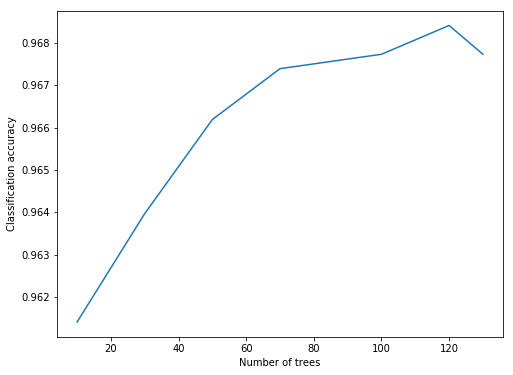

In [56]:
plt.figure(figsize=(8,6))
plt.plot([10,30,50,70,100, 120, 130], [0.96141, 0.96397, 0.96619, 0.96739, 0.96773, 0.96841, 0.96773])
plt.xlabel('Number of trees')
plt.ylabel('Classification accuracy')
# plt.title('Classification accuracy against regularisation parameter C')
plt.show()

In [59]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_joint_success_project
2. num_joint_project
3. team_age_in_days
4. num_Create_Q4
5. num_Create
6. num_Push_Q4
7. num_Push
8. activity_intensity_Q4
9. normalized_proj_span
10. activity_intensity


In [22]:
# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_val = rf.score(X_test, y_test)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Accuracy score on the val dataset: 0.96637
Precision on val: 0.98487
Recall on val: 0.88032


In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.997552785840305
Precision on train: 0.99976
Recall on train: 0.98994

Accuracy score on the val dataset: 0.96773
Precision on val: 0.98666
Recall on val: 0.87964


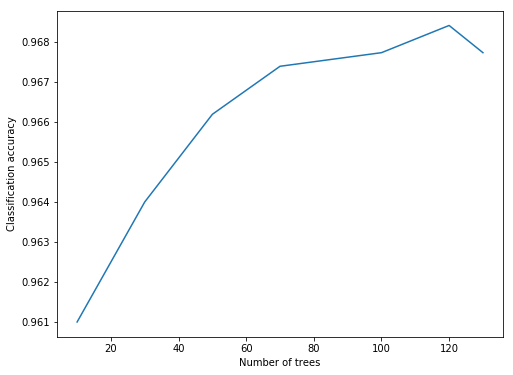

In [33]:
plt.figure(figsize=(8,6))
plt.plot([10,30,50,70,100, 120, 130], [0.961, 0.964, 0.96619, 0.96739, 0.96773, 0.96841, 0.96773])
plt.xlabel('Number of trees')
plt.ylabel('Classification accuracy')
# plt.title('Classification accuracy against regularisation parameter C')
plt.show()

In [21]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
ca = svc_poly.score(X_tr, y_tr)
print('Ploy SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_poly.score(X_val, y_val)
print('Poly SVC classification accuracy on val set: {:.5f}'.format(ca))

Ploy SVC classification accuracy on training set: 0.95549
Poly SVC classification accuracy on val set: 0.94007


In [23]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
ca = svc_linear.score(X_tr, y_tr)
print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_linear.score(X_val, y_val)
print('Linear SVC classification accuracy on val set: {:.5f}'.format(ca))

Linear SVC classification accuracy on training set: 0.95020
Linear SVC classification accuracy on val set: 0.94810


In [24]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))




Radial Basis Function SVC classification accuracy on training set: 0.95521
Radial Basis Function SVC classification accuracy on val set: 0.94912


In [63]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
ca = svc_rbf.score(X_val, y_val)
print('\nRadial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))



Radial Basis Function SVC classification accuracy on training set: 0.95475
Precision on train: 0.99706
Recall on train: 0.81202
F1 on train: 0.89508

Radial Basis Function SVC classification accuracy on val set: 0.94212
Precision on val: 0.99099
Recall on val: 0.76977
F1 on val: 0.86648


In [64]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
y_pred = svc_linear.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
ca = svc_linear.score(X_tr, y_tr)
print('\nLinear SVC classification accuracy on training set: {:.5f}'.format(ca))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_linear.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
ca = svc_linear.score(X_val, y_val)
print('\nLinear SVC classification accuracy on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))


Linear SVC classification accuracy on training set: 0.95043
Precision on train: 0.99699
Recall on train: 0.79382
F1 on train: 0.88388

Linear SVC classification accuracy on val set: 0.94127
Precision on val: 0.99273
Recall on val: 0.76487
F1 on val: 0.86403


In [65]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
y_pred = svc_poly.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
ca = svc_poly.score(X_tr, y_tr)
print('\nPoly SVC classification accuracy on training set: {:.5f}'.format(ca))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_poly.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
ca = svc_poly.score(X_val, y_val)
print('\nPoly SVC classification accuracy on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))


Poly SVC classification accuracy on training set: 0.95549
Precision on train: 0.99824
Recall on train: 0.81418
F1 on train: 0.89686

Poly SVC classification accuracy on val set: 0.94007
Precision on val: 0.97281
Recall on val: 0.77607
F1 on val: 0.86337


In [15]:
# tune SVM rbf
C = np.logspace(-2, 1, 4)
gamma = np.logspace(-4, -1, 4)
score_array = np.zeros((4,4))


for i in range(len(C)):
    for j in range(len(gamma)):
        svc_rbf = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
print(score_array)


[[0.75601844 0.94075465 0.94075465 0.94007171]
 [0.94075465 0.94092539 0.94075465 0.94075465]
 [0.94092539 0.94092539 0.94212054 0.94280348]
 [0.94075465 0.9419498  0.94263275 0.94348643]]


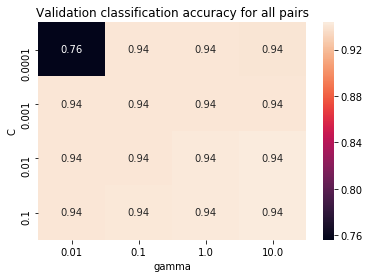

In [16]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=C, yticklabels=gamma)
plt.ylabel('C')
plt.xlabel('gamma')
plt.title('Validation classification accuracy for all pairs')
plt.show()

In [66]:
# tune SVM rbf
C = np.logspace(-1, 2, 4)
gamma = np.logspace(-2, 1, 4)
score_array = np.zeros((4,4))


for i in range(len(C)):
    for j in range(len(gamma)):
        svc_rbf = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
print(score_array)

[[0.94092539 0.94075465 0.94041318 0.92760799]
 [0.94092539 0.94297422 0.94160833 0.9371692 ]
 [0.9419498  0.94365716 0.93751067 0.93802288]
 [0.94280348 0.94212054 0.94246201 0.93785214]]


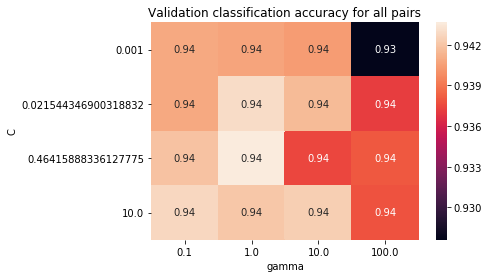

In [67]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=C, yticklabels=gamma)
plt.ylabel('C')
plt.xlabel('gamma')
plt.title('Validation classification accuracy for all pairs')
plt.show()

In [68]:
# tune SVM rbf
C = np.logspace(-1, 2, 4)
gamma = np.logspace(-2, 1, 4)
score_array = np.zeros((4,4))


for i in range(len(C)):
    for j in range(len(gamma)):
        svc_rbf = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
print(score_array)

[[0.94075465 0.94075465 0.9371692  0.92760799]
 [0.94212054 0.94280348 0.94075465 0.9371692 ]
 [0.94263275 0.94348643 0.94075465 0.93802288]
 [0.94229128 0.94553526 0.94280348 0.93785214]]


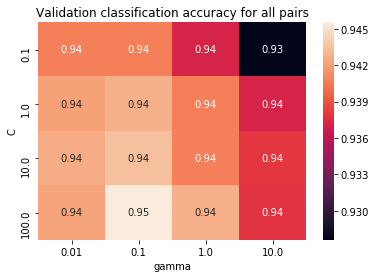

In [70]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=gamma, yticklabels=C)
plt.ylabel('C')
plt.xlabel('gamma')
plt.title('Validation classification accuracy for all pairs')
plt.show()

In [83]:
for i in (0.1,1,10,100,1000):
    svc_rbf = SVC(C=i, kernel='rbf', gamma=0.001)
    svc_rbf.fit(X_tr, y_tr)
    print(svc_rbf.score(X_val, y_val))

0.9409253884241079
0.9409253884241079
0.9419498036537477
0.9428034830117807
0.9412668601673212


In [80]:
new_score_array = np.append(score_array, [[0.9470718798019464,0.9429742188833874,0.9405839166808947,0.936315519890729]], axis=0)

In [87]:
n = np.append([[0.9409253884241079],
[0.9409253884241079],
[0.9419498036537477],
[0.9428034830117807],
[0.9412668601673212]], new_score_array, axis=1)
n

array([[0.94092539, 0.94075465, 0.94075465, 0.9371692 , 0.92760799],
       [0.94092539, 0.94212054, 0.94280348, 0.94075465, 0.9371692 ],
       [0.9419498 , 0.94263275, 0.94348643, 0.94075465, 0.93802288],
       [0.94280348, 0.94229128, 0.94553526, 0.94280348, 0.93785214],
       [0.94126686, 0.94707188, 0.94297422, 0.94058392, 0.93631552]])

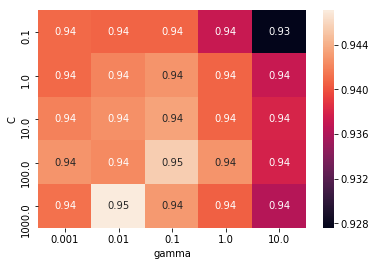

In [89]:
C = np.logspace(-1, 3, 5)
gamma = np.logspace(-3, 1, 5)
plt.figure()
sns.heatmap(n, annot=True, xticklabels=gamma, yticklabels=C)
plt.ylabel('C')
plt.xlabel('gamma')
# plt.title('Validation classification accuracy for all pairs')
plt.show()

In [90]:
svc_rbf = SVC(kernel='rbf', C=1000, gamma=0.01)
svc_rbf.fit(X_tr, y_tr)
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
ca = svc_rbf.score(X_val, y_val)
print('\nRadial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))


Radial Basis Function SVC classification accuracy on training set: 0.97661
Precision on train: 0.99788
Recall on train: 0.90350
F1 on train: 0.94835

Radial Basis Function SVC classification accuracy on val set: 0.94707
Precision on val: 0.95012
Recall on val: 0.82645
F1 on val: 0.88398


In [27]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


MLP classification accuracy on training set: 0.95549
Precision on train: 0.97884
Recall on train: 0.83070

MLP classification accuracy on validation set: 0.94810
Precision on val: 0.96449
Recall on val: 0.81735


In [28]:
y_pred = mlp.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Precision on val: 0.96809
Recall on val: 0.79986


In [23]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30,30,20), random_state=2019)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Precision on train: 0.99502
Recall on train: 0.90876
Precision on val: 0.92242
Recall on val: 0.83205


In [21]:
hidden_dim = np.array([10,50,100,150,200])

n_layer = np.array([2,3,5,10])


score_array = np.zeros((5,4))
for h in range(len(hidden_dim)):
    for n in range(len(n_layer)):
        h_l_z = np.repeat(hidden_dim[h], n_layer[n])
        mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=h_l_z, random_state=201902)
        mlp.fit(X_tr, y_tr)
        score_array[h][n] = mlp.score(X_val, y_val)

    
print(score_array)

[[0.94570599 0.94946218 0.94536452 0.94365716]
 [0.94399863 0.9438279  0.93768141 0.94348643]
 [0.94434011 0.94365716 0.94041318 0.94246201]
 [0.94399863 0.94297422 0.94280348 0.93887656]
 [0.94348643 0.94229128 0.94160833 0.94229128]]


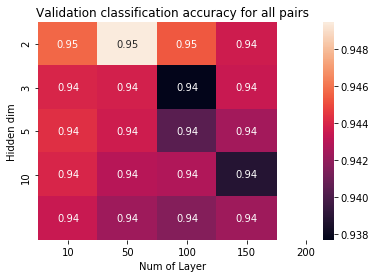

In [22]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=hidden_dim, yticklabels=n_layer)
plt.ylabel('Hidden dim')
plt.xlabel('Num of Layer')
plt.title('Validation classification accuracy for all pairs')
plt.show()

In [91]:
hidden_dim = np.array([5,10,50,100,150])

n_layer = np.array([1,3,5,10])


score_array = np.zeros((5,4))
for h in range(len(hidden_dim)):
    for n in range(len(n_layer)):
        h_l_z = np.repeat(hidden_dim[h], n_layer[n])
        mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=h_l_z, random_state=201902)
        mlp.fit(X_tr, y_tr)
        score_array[h][n] = mlp.score(X_val, y_val)

    
print(score_array)

[[0.94792556 0.93973024 0.9504866  0.94024244]
 [0.94792556 0.94946218 0.94536452 0.94365716]
 [0.94519379 0.9438279  0.93768141 0.94348643]
 [0.94416937 0.94365716 0.94041318 0.94246201]
 [0.94280348 0.94297422 0.94280348 0.93887656]]


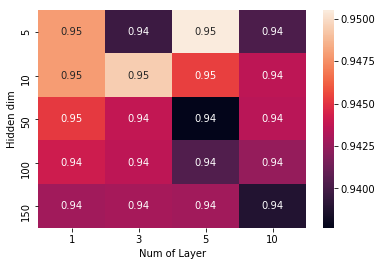

In [99]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=n_layer, yticklabels=hidden_dim)
plt.ylabel('Hidden dim')
plt.xlabel('Num of Layer')
# plt.title('Validation classification accuracy for all pairs')
plt.show()

In [100]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3,3,3,3), random_state=2019)
mlp.fit(X_tr, y_tr)
mlp.score(X_val, y_val)

0.9416083319105344

In [102]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3,3,3,3,3,3,3,3,3), random_state=2019)
mlp.fit(X_tr, y_tr)
mlp.score(X_val, y_val)

0.9368277275055489

In [103]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3,3), random_state=2019)
mlp.fit(X_tr, y_tr)
mlp.score(X_val, y_val)

0.9412668601673212

In [104]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3), random_state=2019)
mlp.fit(X_tr, y_tr)
mlp.score(X_val, y_val)

0.9504865972340789

In [109]:
n = np.append([[0.9504865972340789,0.9412668601673212,0.9416083319105344,0.9368277275055489]],score_array, axis=0)

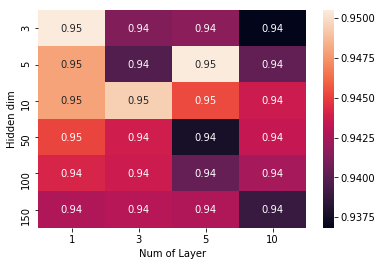

In [110]:
hidden_dim = np.array([3,5,10,50,100,150])
plt.figure()
sns.heatmap(n, annot=True, xticklabels=n_layer, yticklabels=hidden_dim)
plt.ylabel('Hidden dim')
plt.xlabel('Num of Layer')
# plt.title('Validation classification accuracy for all pairs')
plt.show()

In [111]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5,5,5,5), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))


MLP classification accuracy on training set: 0.96250
Precision on train: 0.98537
Recall on train: 0.85489
F1 on train: 0.91550

MLP classification accuracy on validation set: 0.95049
Precision on val: 0.97027
Recall on val: 0.82225
F1 on val: 0.89015
